# <font color='maroon'>Poisson distribution</font>

The Poisson distribution is a discrete probability distribution where events take on discrete values. For example, what is the probability that a plane crashes? Or that there will be an oil spill in a pipeline in Nigeria?  We will start by looking at a universal example: what is the probability of receiving 10 or 20 or 30 spam emails within an hour? We will then look into plane crashes by the end of the notebook.


### The case of spam emails

Suppose you receive on average 5 spam emails a day. We assume spam messages are received at random and  the messages are independent of each other. It is important for the arrival of spam messages to be indpendent of each other otherwise a Poisson distribution will not be the best model for this. We let $X$ be the number of spam emails we receive per day and the mean arrival of these emails per day, which is $\lambda = 5$. 

The following formula will helps us determine the probability of receiving 10 or 50 or a 100 spam emails in a day.

\begin{align}
p(x) &= \dfrac{e^{-\lambda}\lambda^x}{x!} \text{ for }x= 0,1,2,3,\ldots\\
   ~ &= 0 \text{ otherwise}
\end{align}

The arrival of $X$ spam emails has a Poisson distribution with parameter $\lambda$ as $X \sim P(\lambda)$. In this example, $X \sim P(5)$.


Let's calculate the probability of receiving no spam using `stats.poisson.pmf(x,rate)`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random

In [2]:
%matplotlib inline

In [3]:
stats.poisson.pmf(0,5)

0.006737946999085467

The probability of received two spam messages:

In [4]:
stats.poisson.pmf(2,5)

0.08422433748856832

## Visualizations

Bar graphs are a great way to see how the probability changes as the average rate of the messages changes.

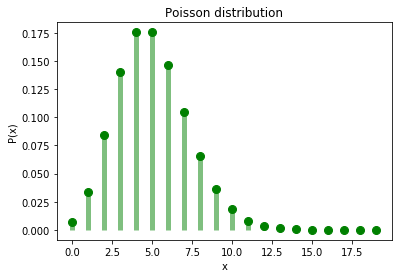

In [5]:
rate = 5
x= np.arange(0,20)  # number of messages
p = stats.poisson.pmf(x, rate)
plt.title('Poisson distribution')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.plot(x,p,'go', ms=8, label='poiss pmf')
plt.vlines(x, 0, p, colors='g', lw=5, alpha=0.5)

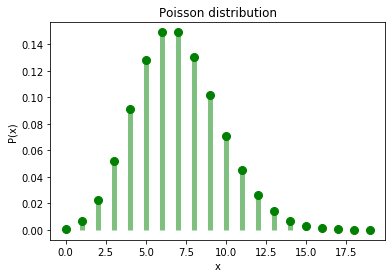

In [6]:
rate = 7
x= np.arange(0,20)  # number of messages
p = stats.poisson.pmf(x, rate)
plt.title('Poisson distribution')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.plot(x,p,'go', ms=8, label='poiss pmf')
plt.vlines(x, 0, p, colors='g', lw=5, alpha=0.5)

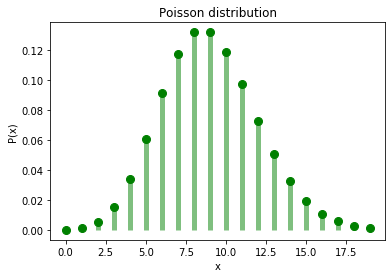

In [7]:
rate = 9
x= np.arange(0,20)  # number of messages
p = stats.poisson.pmf(x, rate)
plt.title('Poisson distribution')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.plot(x,p,'go', ms=8, label='poiss pmf')
plt.vlines(x, 0, p, colors='g', lw=5, alpha=0.5)


## Expected value and variance

The expected value or mean of the Poisson distribution equals the average rate of the distribution. The variance also equals the average rate. Recall that the variance or standard deviation indicates how far each observation deviates from the mean. 

## Cumulative distribution

A cumulative distribution answers questions like, what is the probability of observing less than 5 arrivals? That is,

$$P(X \leq 5) = P(0) + P(1) + P(2) + P(3) + P(4) + P(5).$$ We can answer this question using the `cdf` function in `scipy.stats` as follows.

In [8]:
stats.poisson.cdf(5,     # Check the probability of 5 arrivals or less
                  rate)   # with arrival rate 

0.1156905208410578

We can draw a cumulative density curve that shows the probability of a random variable having probability less or greater than a certain probability.

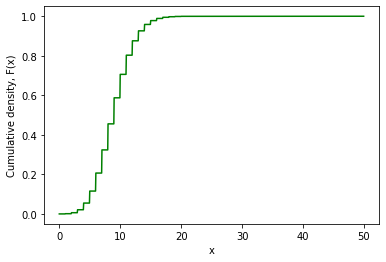

In [9]:
x = np.arange(0,50,.05)
y = stats.poisson.cdf(x, rate)
plt.xlabel('x')
plt.ylabel('Cumulative density, F(x)')
plt.plot(x,y,'g-')

### Exercise

A Poisson distribution can be used to predict the number of air disasters. This article, [How common are plane crashes?](https://www.theguardian.com/world/2014/jul/24/how-common-are-plane-crashes), says air disasters occur 86 times on average and in five years. In 2011 there were 92 accidents, in 2010, 94 accidents, in 2009, 90 accidents. Suppose the average rate of accidents per year is 90.  

#### Question 1
Plot a density curve for the random variable of air traffic accidents.





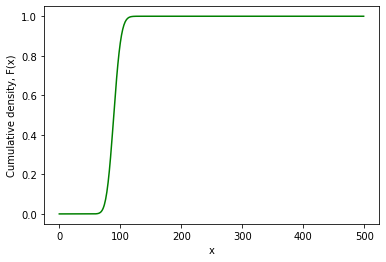

In [10]:
#Let us plot a density curve for the random variable of air traffic accidents: 
rate = 90
x = np.arange(0,500)
y = stats.poisson.cdf(x, rate)
plt.xlabel('x')
plt.ylabel('Cumulative density, F(x)')
plt.plot(x,y,'g-')

#### Question 2
What is the probability of observing 200 air traffic accidents?

In [11]:
# your answer
stats.poisson.pmf(200, 90)

7.330099612489659e-24

#### Question 3 
Plot a cumulative density curve. What is the probability of observer more than 200 air traffic accidents. Use the following logic:
\begin{align*}
P(X > 200) &=  1 - [P(X) \leq 200] \\
             &=  1 - [P(0) + P(1) + ... + P(200)] \\
\end{align*}
Use the cdf function to compute  $P(0) + P(1) + ... + P(200)$.


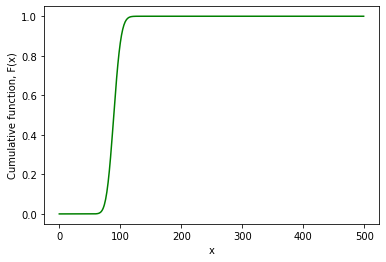

In [12]:
# Plot a cumulative density curve
rate = 90
x = np.arange(0, 500)
y = stats.poisson.cdf(x,rate)
plt.xlabel('x')
plt.ylabel('Cumulative function, F(x)')
plt.plot(x, y, 'g-')

In [13]:
# What is the probability of observer more than 200 air traffic accidents. Use the following logic:
rate = 90
1 - stats.poisson.cdf(200, rate) # P(X>=200) = 1- P(X<200)=1-F(200) or F(200)=stats.poisson.cdf(200, rate)

0.0